In [1]:
import numpy as np
from sklearn.model_selection import train_test_split as TTS
from sklearn import datasets
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap

In [2]:
data= datasets.load_wine()

In [3]:
train, labels = data.data, data.target

In [4]:
train.shape

(178, 13)

In [5]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [62]:
x_train, x_test, y_train, y_test = TTS(train, labels, train_size = 0.7, shuffle = True )

In [7]:
data_train

array([[1.305e+01, 5.800e+00, 2.130e+00, ..., 7.300e-01, 3.100e+00,
        3.800e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02],
       [1.305e+01, 1.730e+00, 2.040e+00, ..., 1.120e+00, 2.910e+00,
        1.150e+03],
       ...,
       [1.222e+01, 1.290e+00, 1.940e+00, ..., 8.600e-01, 3.020e+00,
        3.120e+02],
       [1.229e+01, 2.830e+00, 2.220e+00, ..., 1.150e+00, 3.300e+00,
        2.900e+02],
       [1.307e+01, 1.500e+00, 2.100e+00, ..., 1.180e+00, 2.690e+00,
        1.020e+03]])

In [8]:
labels_train

array([1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1,
       1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2,
       0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2,
       1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0])

In [18]:
def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

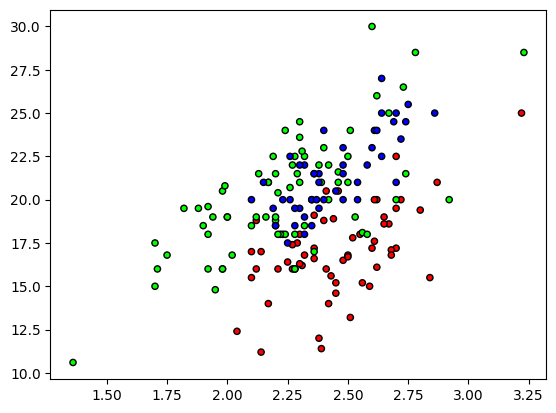

In [19]:
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
plt.figure()
plt.scatter(train[:, 2], train[:, 3], c = labels, cmap = cmap, edgecolor = "k", s = 20)
plt.show()

In [69]:
class KNN:
    
    def __init__(self, k = 3):
        self.k = k
        
    def fit(self, x, y):
        self.x_train = x
        self.y_train = y
        
    
    def predict(self, x):
        predict = [self._predictor(X) for X in x]
        return np.array(predict)
    
    def _predictor(self, x):
        distances = [euclidean_dist(x, x_train) for x_train in self.x_train]
        
        k_indices = np.argsort(distances)[0: self. k]
        k_nearest_label = [self.y_train[i] for i in k_indices]
        
        most_common = Counter(k_nearest_label).most_common(1)
        return most_common[0][0]

In [70]:
clf = KNN(k=3)
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)

In [71]:
acc = np.sum(predicted == y_test) / len(y_test)

In [72]:
acc

0.7777777777777778